Today's Date is:  2023-01-24
[*********************100%***********************]  1 of 1 completed
77
[240.74000549 248.88000488 249.19999695 246.78999329 234.24000549
 229.25       225.41000366 225.75       234.24000549 228.55999756
 237.52999878 238.5        236.47999573 236.1499939  242.11999512
 247.25       250.66000366 231.32000732 226.75       235.86999512
 232.13000488 228.16999817 220.1000061  214.25       221.38999939
 227.86999512 228.86999512 224.50999451 242.97999573 247.11000061
 241.55000305 241.97000122 241.72999573 241.67999268 241.22000122
 242.05000305 245.02999878 247.58000183 247.49000549 241.75999451
 240.33000183 255.13999939 254.69000244 255.02000427 250.19999695
 245.11999512 244.36999512 247.3999939  245.41999817 252.50999451
 256.92001343 257.22000122 249.00999451 244.69000244 240.44999695
 241.80000305 244.42999268 238.19000244 238.72999573 236.96000671
 234.52999878 241.00999451 239.82000732 239.58000183 229.1000061
 222.30999756 224.92999268 227.11999512 22

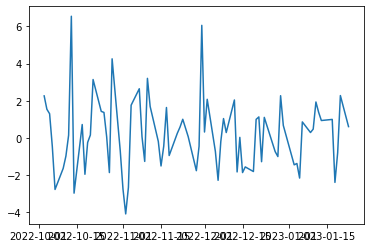

In [1]:
#Welcome to Alpha Vantage! Your API key is: 6NY98HFWJ7HOKS8D. Please record this API key at a safe place for future data access.

# Import yfinance 
import numpy as np
import yfinance as yf   
 
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date 
from datetime import date
today = str(date.today())
print("Today's Date is: ",today)

data = yf.download('MSFT','2022-10-01',today) 
 
#data = yf.download(tickers='AAPL', period='1d', interval='1m') #to download 1 day recent data
# Plot the close prices 
import matplotlib.pyplot as plt 

#data.High.plot() 

x=np.array(data.Close)
y=np.array(data.Open)

delta=data.Close-data.Open

d=(np.array(delta)/data.Open)*100

print(len(d))
print(x)
plt.show() 

print(data.Close)

fig1=plt.figure()
ax1=fig1.add_subplot(111)

ax1.plot(d)

print("Mean fluctuation is",np.mean(d))
print("Median fluctuation is",np.median(d))
print("Standara Deviation of the fluctuation is",np.std(d))

In [2]:
print(type(delta))
#print(np.sign(delta))
sign_delta=np.sign(delta)
vc=sign_delta.value_counts()
print(vc)

<class 'pandas.core.series.Series'>
 1.0    43
-1.0    34
dtype: int64


77
28.478491681166215


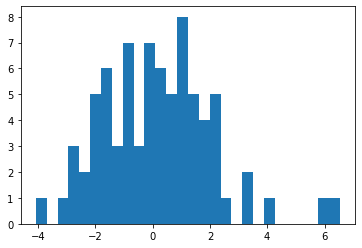

In [3]:
n=len(d)
print(n)
bin=3.49*np.std(d)*(n**(1/3))
print(bin)
counts, bins, bars=plt.hist(d,int(bin))
a=list(zip(counts,bins))

[ 0.00000000e+00  1.13206783e+00  1.27016996e+00  1.27885937e+00
  9.31126102e-01  3.15167104e-01  3.72071360e-02 -8.88078443e-02
 -6.16867266e-02  5.99019085e-01  2.75162666e-01  3.12659585e-01
  1.38709243e-01  1.11926724e-01  1.15209584e-01  3.04502697e-01
  3.70810681e-01  4.26603116e-01  4.07565650e-01  2.94346444e-01
  4.83022186e-01  4.29371544e-01  2.91536313e-01  1.09424696e-01
 -1.09062475e-03  6.68401593e-02  1.62466939e-01  1.59319277e-01
  1.10450959e-01  2.13665908e-01  2.61468329e-01  2.47615360e-01
  1.94594379e-01  1.76030124e-01  2.17862664e-01  1.85688412e-01
  1.87610550e-01  1.98230228e-01  2.18986153e-01  2.15331158e-01
  1.67261383e-01  1.52725530e-01  2.90021350e-01  2.90770929e-01
  3.30564851e-01  3.07765082e-01  2.52864743e-01  2.43682390e-01
  2.60047643e-01  2.60731457e-01  2.95714303e-01  2.54974351e-01
  2.50823898e-01  2.11801608e-01  1.79714167e-01  1.44343724e-01
  1.59399274e-01  1.76197211e-01  1.51643311e-01  1.67610093e-01
  1.52912479e-01  1.34377

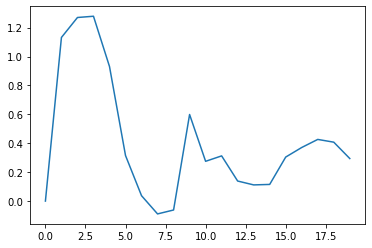

In [4]:
arr=(np.array(d))
moving_d=np.zeros(len(d))
n=1
for i in range(len(d)):
    #a=np.split(arr,{i}[0])
    moving_d[i]=np.sum(arr[0:i])/n
    n+=1
    #moving_d[i]=sum/(i+1)
    #print(f"moving_d{i}={moving_d[i]}")

print(moving_d)

plt.plot(np.arange(0,20,1),moving_d[0:20])

In [5]:
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

#Interval required 1 minute


print(data)

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Uber live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-03  235.410004  241.610001  234.660004  240.740005  240.063461   
2022-10-04  245.089996  250.360001  244.979996  248.880005  248.180588   
2022-10-05  245.990005  250.580002  244.100006  249.199997  248.499680   
2022-10-06  247.929993  250.339996  246.080002  246.789993  246.096451   
2022-10-07  240.899994  241.320007  233.169998  234.240005  233.581741   
...                ...         ...         ...         ...         ...   
2023-01-17  237.970001  240.910004  237.089996  240.350006  240.350006   
2023-01-18  241.570007  242.380005  235.520004  235.809998  235.809998   
2023-01-19  233.779999  235.520004  230.679993  231.929993  231.929993   
2023-01-20  234.860001  240.740005  234.509995  240.220001  240.220001   
2023-01-23  241.100006  245.169998  239.649994  242.580002  242.580002   

              Volume  
Date          

/bin/bash: pip: command not found


In [7]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='6NY98HFWJ7HOKS8D', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
print(type(data))
pprint(data.head(2))

<class 'pandas.core.frame.DataFrame'>
                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-10-29 20:00:00   331.76   331.76  331.76    331.76     1183.0
2021-10-29 19:56:00   331.90   331.90  331.85    331.85     1360.0
